In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape
# TF(N(개수),H(세로길이),W(가로길이),C(채널 1:흑백(Grayscale) 3:컬러(RGB color)))

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [3]:
image = X_train[0]
print(image.shape)

(28, 28)


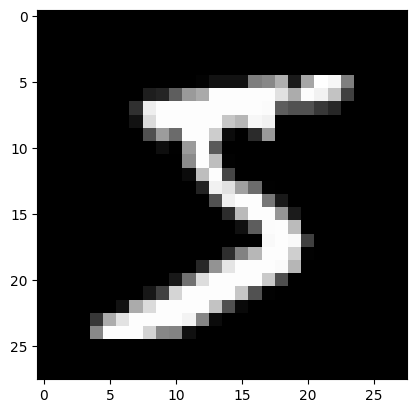

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
#Fully connected Layer
#(28,28) -> 열벡터로 변환 (764,3(뉴런수))
#(60000, 28, 28) -> (60000, 784)

In [6]:
import pandas as pd

pd.DataFrame(image).style.background_gradient(cmap='Blues')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


Fully Connected Layer 만들기

* 레이어들은 `tf.keras.layers` 패키지에 모두 들어 있다.
* `Flatten Layer` : 배치(BATCH)를 제외한 평탄화 담당
  * `numpy` 할 때는 `reshape`, 배치 개수 따로 빼고 해야 했는데, 여기선 그럴 필요가 없다.
* `Dense Layer` : `Affine`연산(신경망의 행렬 내적 계산). **Fully Connected**
  * `Dense Layer` 파라미터에 `activation`을 지정 가능
* `Activation Layer` : 활성화 함수 레이어(선택에 따라서 사용을 안할 수도 있다.)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Activation

#Sequential 모델을 만들 때는 리스트에 레이어를 쌓아놓음
model = Sequential([Input(shape=(28,28)), # 입력층 : 배치 크기(N)를 제외한 나머지 데이터 shape 입력
                    Flatten(), # 평탄화층 (배치사이즈 제외)
                    
                    #Fully Connected 구성

                    #HIDDEN LAYER
                    Dense(512, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(512, activation='relu'),

                    #출력층 숫자(0~9)10개
                    Dense(10, activation='softmax')
                    
                    ])

#모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
No

# 최적화 계획 세우기 - 컴파일
* `Loss Function`(손실 함수) - MSE, CEE를 쓸지를 결정
* `Optimization`(최적화 함수) - SGD, ADAM, RMSProps 등을 지정
  * 거의 대부분 ADAM, RMSProps 등을 기본으로 사용
* `Metrics` - 테스트 세트에 대한 평가 기준
  * `acc`, `recall`, `precision`

## Loss Function 선정 기준
* 이진 분류를 수행하는 경우(Binary Classification)
  * `mse` : 출력층의 뉴런이 1개인 경우 - with `sigmoid`
  * `cross entropy error` : 출력층의 뉴런이 2개인 경우 - with `softmax` ( 제일 자주 사용되는 방법 )
    * **`binary_crossentropy`**를 사용하면 된다.
* 다중 분류를 수행하는 경우(Multiclass Classification)
  * `cross entropy error` : 출력층의 뉴런을 클래스의 개수만큼 설정
    * **`categorical_crossentropy`**를 사용하면 된다.

### Categorical Cross Entropy의 종류
  * Label이 `[0, 1, 2]` 처럼 One-Hot Encoding이 되어있지 않은 경우
    * **`sparse_categorical_crossentropy`**를 사용
  * Label이 One-Hot Encoding이 되어있는 경우
    * **`categorical_crossentropy`**를 사용

y_train을 확인해서 어떤 Loss Function을 사용할지 결정

In [20]:
y_train.shape

(60000,)

In [21]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

y_train 확인한 결과 OHE 되어있지 않은 상태. sparse_categorical_crossentropy를 활용하거나, y_train을 One Hot Encoding 한 다음 categorical_crossentropy를 사용하면 된다.

In [22]:
# loss function
loss_func = tf.keras.losses.sparse_categorical_crossentropy
loss_func

<function keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1, ignore_class=None)>

In [23]:
# y_train이 OHE이 되어 있으면 categorical_crossentropy
tf.keras.losses.categorical_crossentropy

<function keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

In [24]:
# 이진 분류라면?
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

## Optimizer 설정
* `sgd` - `tf.keras.optimizers.SGD()`
* `rmsprops` - `tf.keras.optimizers.RMSprop()`
* `adam` - `tf.keras.optimizers.Adam()` - 일반적으로 제일 많이 사용하는 최적화 기법, 뭘 쓸지 모르겠다면 `adam`을 선택하세요

In [25]:
optm = tf.keras.optimizers.Adam()
optm

## Metrics 설정
- 테스트(검증) 세트 평가 방법
- 훈련에 영향을 미치는 것이 아닌, 확인 용도의 설정
- 일반적으로는 정확도로 설정
  - `accuracy`, `acc` 중 하나로 설정.

In [26]:
metrics = ['acc']

In [27]:
# 훈련 수행 전에 모델에 손실함수, 최적화방법, 평가방법을 적용
model.compile(
    optimizer = optm,
    loss = loss_func,
    metrics = metrics
)

훈련

In [29]:
#훈련용 하이퍼 파라미터 설정
#에폭, 배치 크기
num_epochs = 10
batch_size = 32

model.fit(X_train,
          y_train,
          batch_size = batch_size,
          epochs = num_epochs,
          shuffle = True, #데이터를 섞어가며서 복잡하게 훈련
          validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 15s 4ms/step - loss: 0.6791 - acc: 0.9008 - val_loss: 0.2320 - val_acc: 0.9300
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1807 - acc: 0.9488 - val_loss: 0.2076 - val_acc: 0.9457
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1541 - acc: 0.9578 - val_loss: 0.1822 - val_acc: 0.9492
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1347 - acc: 0.9638 - val_loss: 0.1515 - val_acc: 0.9621
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1230 - acc: 0.9685 - val_loss: 0.1436 - val_acc: 0.9651
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1060 - acc: 0.9728 - val_loss: 0.1582 - val_acc: 0.9674
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1037 - acc: 0.9747 - val_loss: 0.1465 - val_acc: 0.9644
Epoch 8/10
1500/1500 [==============================] - 6s 4m

최종 평가
- 테스트 세트로 평가

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1420 - acc: 0.9723


[0.1419600397348404, 0.9722999930381775]